In [17]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# if you are reading from a local file, replace with following line
# df = pd.read_csv('dataseries.csv')
df = pd.DataFrame({'a': [1,3,9,2,4], 'b': [3,7,8,1,8]})

print("Sample Data" )
print(df.head())
print(df.describe())

Sample Data
   a  b
0  1  3
1  3  7
2  9  8
3  2  1
4  4  8
              a         b
count  5.000000  5.000000
mean   3.800000  5.400000
std    3.114482  3.209361
min    1.000000  1.000000
25%    2.000000  3.000000
50%    3.000000  7.000000
75%    4.000000  8.000000
max    9.000000  8.000000


In [23]:
# pull out the list from pandas frame
#values=list(df['a'])
#test=df.tolist()

#get coordinates of all the points
#nPoints = len(values)
#print(values)
#allCoord = np.vstack((range(nPoints), values)).T
allCoord[0]=[2,3]
allCoord[1]=[4,5]
allCoord[2]=[3,7]
allCoord[3]=[8,10]
allCoord[4]=[3,4]
#np.array([range(nPoints), values])
print("allCoord 0 and 1")
print(allCoord)
print(allCoord[-1])
# get the first point
firstPoint = allCoord[0]
# get vector between first and last point - this is the line
lineVec = allCoord[-1] - allCoord[0]
lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))

# find the distance from each point to the line:
# vector between all points and first point
vecFromFirst = allCoord - firstPoint

# To calculate the distance to the line, we split vecFromFirst into two 
# components, one that is parallel to the line and one that is perpendicular 
# Then, we take the norm of the part that is perpendicular to the line and 
# get the distance.
# We find the vector parallel to the line by projecting vecFromFirst onto 
# the line. The perpendicular vector is vecFromFirst - vecFromFirstParallel
# We project vecFromFirst by taking the scalar product of the vector with 
# the unit vector that points in the direction of the line (this gives us 
# the length of the projection of vecFromFirst onto the line). If we 
# multiply the scalar product by the unit vector, we have vecFromFirstParallel
scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
vecToLine = vecFromFirst - vecFromFirstParallel

# distance to line is the norm of vecToLine
distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))

# knee/elbow is the point with max distance value
idxOfBestPoint = np.argmax(distToLine)

print("Knee of the curve is at index =",idxOfBestPoint)
print("Knee value =", values[idxOfBestPoint])

allCoord 0 and 1
[[ 2  3]
 [ 4  5]
 [ 3  7]
 [ 8 10]
 [ 3  4]]
[3 4]
Knee of the curve is at index = 2
Knee value = 9


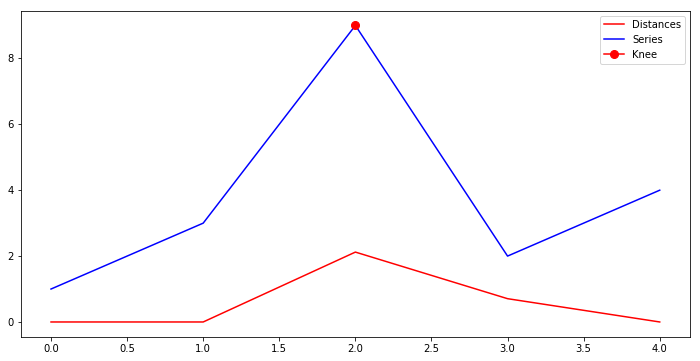

In [24]:
# plot of the original curve and its corresponding distances
plt.figure(figsize=(12,6))
plt.plot(distToLine,label='Distances',color='r')
plt.plot(values,label='Series',color='b')
plt.plot([idxOfBestPoint], values[idxOfBestPoint], marker='o', markersize=8, color="red", label='Knee')
plt.legend()
plt.show()

In [28]:
from kneed import DataGenerator, KneeLocator
x=pd.DataFrame({'a': [1,3,9,2,4], 'b': [3,7,8,1,8]})
y=[-5. , 0.26315789, 1.89655172, 2.69230769, 3.16326531, 3.47457627, 3.69565217, 3.86075949, 3.98876404, 4.09090909]
kneedle = KneeLocator(x, y, S=1.0, invert=False)
print(kneedle.knee)

ValueError: x values must be sorted